In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
mat = pd.read_csv("C:/Users/tulik/Downloads/student-mat.csv")

In [4]:
mat.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']
mat.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
mat['final_grade'] = 'na'
mat.loc[(mat.final_score >= 15) & (mat.final_score <= 20), 'final_grade'] = 'good' 
mat.loc[(mat.final_score >= 10) & (mat.final_score <= 14), 'final_grade'] = 'fair' 
mat.loc[(mat.final_score >= 0) & (mat.final_score <= 9), 'final_grade'] = 'poor' 
mat.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


Text(0, 0.5, 'Number of Students')

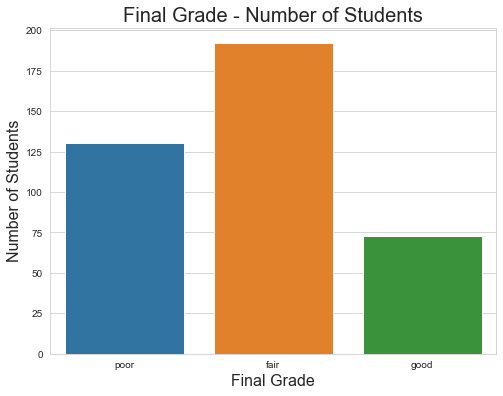

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(mat.final_grade, order=["poor","fair","good"])
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

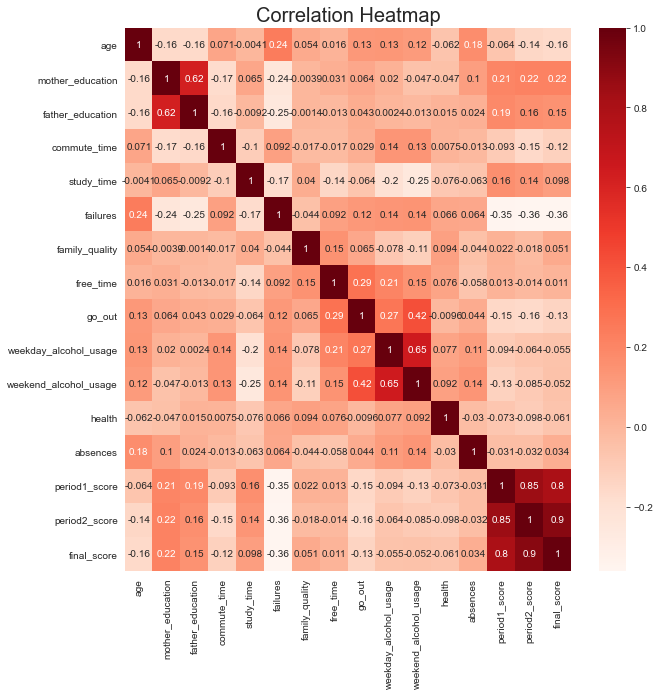

In [7]:
corr = mat.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [ ]:
#good = mat.loc[mat.final_grade == 'good']
#poor = mat.loc[mat.final_grade == 'poor']
#good['good_student_father_education'] = good.father_education
#poor['poor_student_father_education'] = poor.father_education
#good['good_student_mother_education'] = good.mother_education
#poor['poor_student_mother_education'] = poor.mother_education

In [ ]:
#plt.figure(figsize=(6,4))
#p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
#p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
#plt.xlabel('Father Education Level', fontsize=20)

In [ ]:
#plt.figure(figsize=(6,4))
#p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
#p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
#plt.xlabel('Mother Education Level', fontsize=20)

Text(0.5, 0, 'Age')

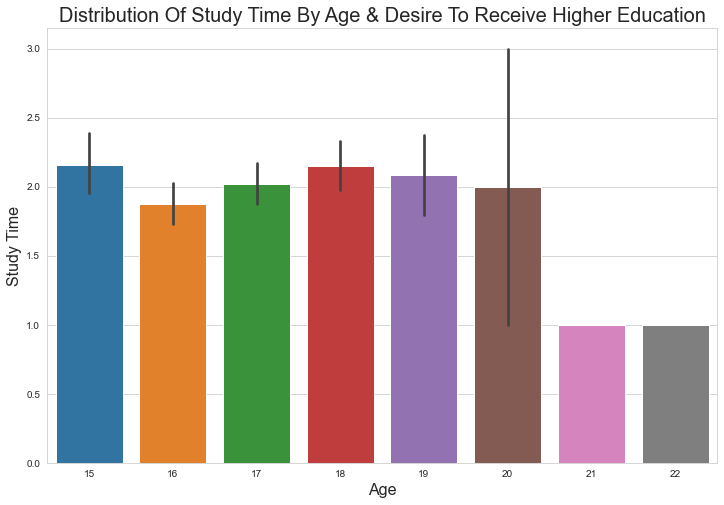

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='age', y='study_time', data=mat)
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [9]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
higher_tab = pd.crosstab(index=mat.final_grade, columns=mat.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

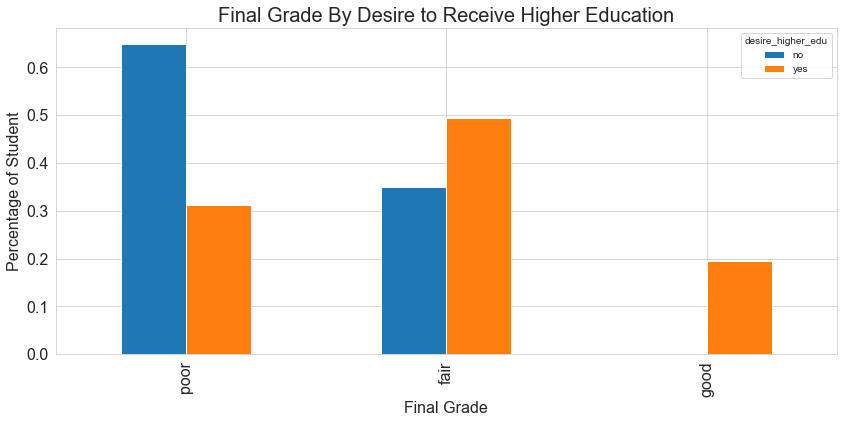

In [10]:
higher_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [11]:
math = mat.copy()
math = math.drop(['final_score'], axis=1)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
math.final_grade = le.fit_transform(math.final_grade)

In [13]:
from sklearn.model_selection import train_test_split
X = math.drop('final_grade',axis=1)
y = math.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [14]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [15]:
len(list(X_train))

58

In [16]:
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

50    0.907563
51    0.907563
52    0.907563
53    0.907563
54    0.907563
55    0.907563
56    0.907563
dtype: float64

In [17]:
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decision Tree Model Score : 0.9202898550724637 , Cross Validation Score : 0.8907563025210085
